# Ford GoBike System Dateset (2018)
## by Nishant Sharma

## Investigation Overview
In this project I performed an exploratory analysis on data provided by Ford GoBike, a bike-share system provider, using Python visualization techniques. The goal is to figure out what variables possess the most influential power on a bike sharing service. This service operates in San Francisco, Oakland, Berkeley and San Jose, etc.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
## Dataset Overview

Ford GoBike Service Dataset includes 3.31 million records of Ford GoBike's bike-sharing service in the greater SF Bay area since the servie went live in 2017. Each record is an individual ride which consists of 16 features, such as member age, gender, ride start/end time, start/end station coordinates and others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('2017_bike_cleaned.csv')

### Ford GoBike Usage by Weekdays

 we can say that tuesday and wednesday are most favoured days and saturday and sunday are least favoured,however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers

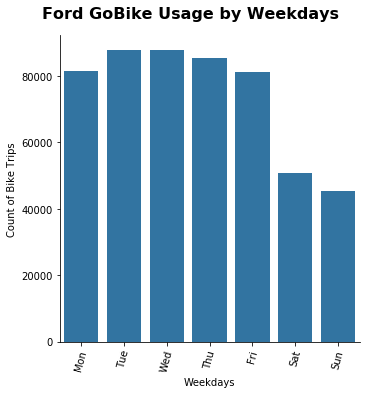

In [4]:
# trip distribution over weekdays of the Ford Go bike system
colour = sb.color_palette()[0]

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph_plot = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = colour, order = weekdays)

graph_plot.set_axis_labels('Weekdays', 'Count of Bike Trips')

graph_plot.fig.suptitle('Ford GoBike Usage by Weekdays', y=1.05, fontsize=16, fontweight='bold');

graph_plot.set_xticklabels(rotation=75);

## Ford GoBike duration vs months
No bike ride is less than of 15 min in any month given and july is the month when people riding for
longer time followed by august and september

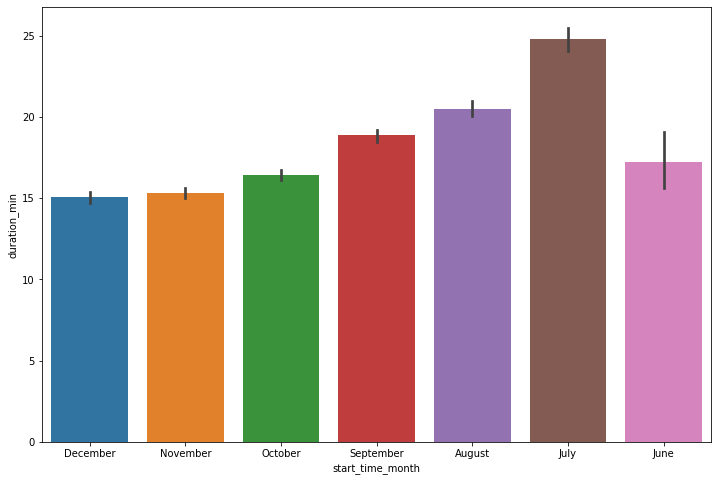

In [10]:
plt.figure(figsize = [12, 8])

sb.barplot(data = df_clean , x = 'start_time_month', y = 'duration_min')
plt.xticks(rotation=0)
plt.show()

### ford gobike Count by Time duration

maximum people are using ford gobike for very short period and it decreases exponentially as time duration increases

Reached


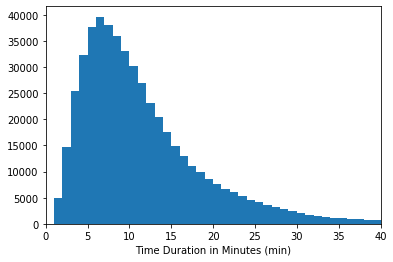

In [11]:
bins = np.arange(0, df_clean['duration_min'].max()+1, 1)
#sb.countplot(data=bike_data,x='duration_hr', color=sb.color_palette()[0])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])
print("Reached")
plt.xlabel('Time Duration in Minutes (min)')
plt.show()

### Ford GoBike System Trip Distance in Kilometer

75% of rides being 2.07 miles or less and most of the rides are being under 3 miles. maximum number of people are riding around 1.5 kilometer 

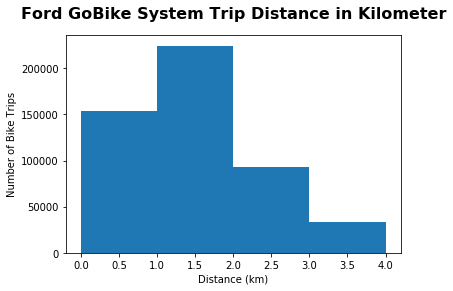

In [6]:
# Distance in miles traveled

bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_clean, x = 'distance_in_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Kilometer", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

### User type split for GoBike sharing system
 we can say that The bike sharing system is mainly used by subscribers (21.3%) than ocassional riders or customers (78.7%)

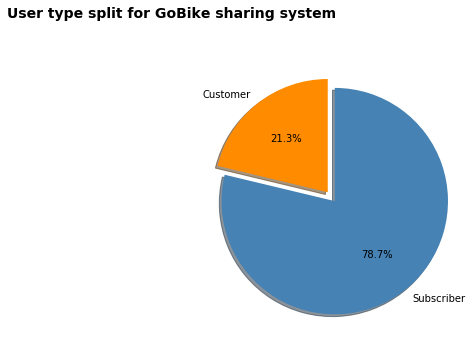

In [8]:
# calculate % of split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean.bike_id.count()
subscriber_proportion = subscriber / df_clean.bike_id.count()

plt.figure(figsize = [10, 5])

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

## Ford Go Bike System - Duration (Min) by User Type¶

>The plots above show the ride duration spread in minutes on X-axis

>This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

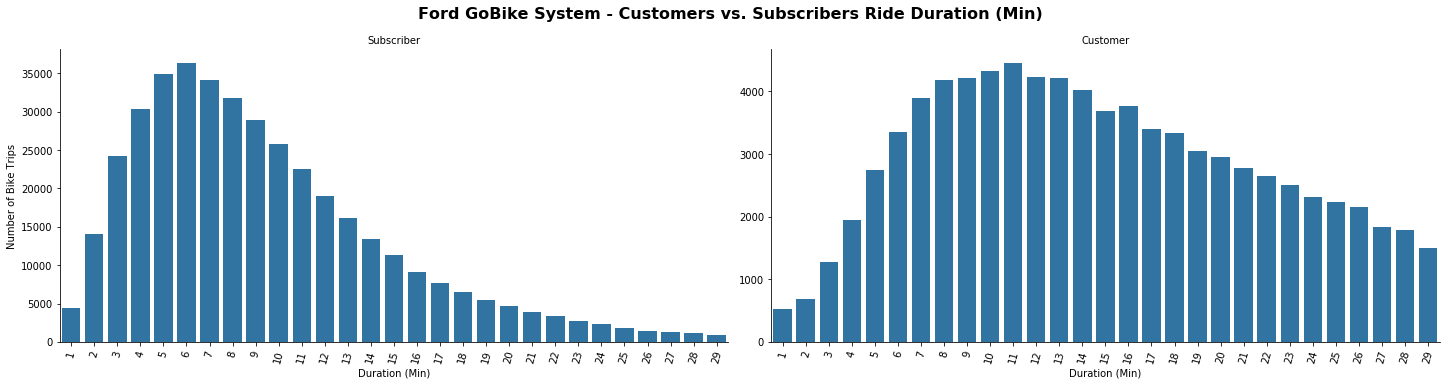

In [9]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_clean.query('duration_min < 30')

graph_plot = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = colour, height=5, aspect=2);

graph_plot.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph_plot.set_titles('{col_name}')

graph_plot.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph_plot.set_xticklabels(rotation=75);

####  average trip duration over weekdays between customers and subscribers 

customers ride much longer as compared to subscriber on every day of week and we also found that, count is minimum on wednesday for both and it's maximum on sunday

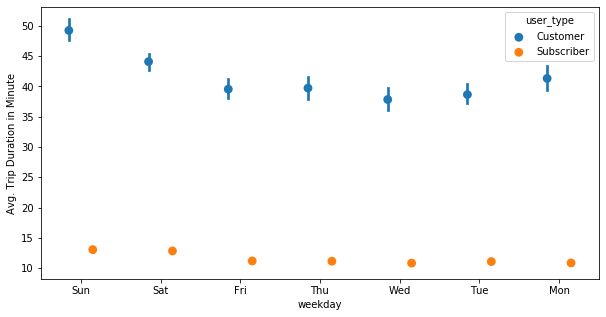

In [12]:
plt.figure(figsize = [10, 5])
sb.pointplot(data=df_clean, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.ylabel('Avg. Trip Duration in Minute');
plt.xlabel('weekday');

## Summary - Ford GoBike System 


- There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, Subscribers used the system heavily on work days concentrated around 8-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.

- There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. 



In [ ]:
!jupyter nbconvert fordgobike_slide_deck.ipynb --to slides --post serve --template output_toggle

#### The url I get as a output of this command:
http://127.0.0.1:8000/fordgobike_slide_deck.slides.html#/5